In [3]:
import os
import scipy.io
import pandas as pd
import numpy 
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from bibliotheque_ensta import *
print('ok')

ok


In [4]:
nom_dir = "/home/datawork-osmose/dataset/ml17_280a/analysis/getFeatures/8000/1H/"

os.chdir(nom_dir)
os.getcwd()

ll = nom_dir + "complete.pkl"

[total_welch, total_tol, aux, total_time, frequencies] = pickle.load(open(ll, 'rb'))

In [5]:
X = prepa_total_tol_time(total_tol, total_time)

In [6]:
nom_dir = "/home4/datahome/rbessoua/Guinet/ml17_280a/"

os.chdir(nom_dir)
os.getcwd()

target = pd.read_csv(nom_dir+"ml17_280a_final.csv")
target.head()

,year,month,day,hour,u10,v10,tp
0,2017,10,7,0,13.987216,-5.187516,0.000105
1,2017,10,7,1,13.978094,-4.036146,0.000164
2,2017,10,7,2,13.691323,-3.196066,0.000176
3,2017,10,7,3,13.197029,-2.782356,0.000131
4,2017,10,7,4,12.761457,-3.055669,0.000041


In [7]:
data = target.merge(X, on = ['year', 'month', 'day', 'hour'])

data['w10']=data['u10']
for i in range(len(data)):
    data['w10'].loc[i] = root_mean_squarred(data['u10'].iloc[i], data['v10'].iloc[i])

/home4/datahome/rbessoua/conda-env/dl-env/lib/python3.9/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


<AxesSubplot:xlabel='w10', ylabel='Count'>

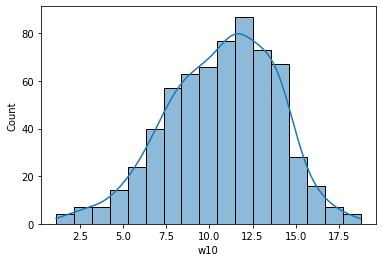

In [8]:
sns.histplot(data['w10'], kde=True)

In [9]:
X = data.drop(['u10', 'v10', 'w10', 'tp'], axis=1)
Y = data['w10']

## Random Forest Transfer (SPMAuralA)

In [10]:
!pip install joblib

from joblib import dump, load
import os
nom_dir = "/home4/datahome/rbessoua/modeles/"

os.chdir(nom_dir)

rf = load('rfv_SPMAuralA.joblib') 

  Using cached https://files.pythonhosted.org/packages/55/85/70c6602b078bd9e6f3da4f467047e906525c355a4dacd4f71b97a35d9897/joblib-1.0.1-py3-none-any.whl
Exception:
Traceback (most recent call last):
  File "/appli/conda-env/jupyterhub/lib/python3.6/site-packages/pip/basecommand.py", line 215, in main
    status = self.run(options, args)
  File "/appli/conda-env/jupyterhub/lib/python3.6/site-packages/pip/commands/install.py", line 342, in run
    prefix=options.prefix_path,
  File "/appli/conda-env/jupyterhub/lib/python3.6/site-packages/pip/req/req_set.py", line 784, in install
    **kwargs
  File "/appli/conda-env/jupyterhub/lib/python3.6/site-packages/pip/req/req_install.py", line 851, in install
    self.move_wheel_files(self.source_dir, root=root, prefix=prefix)
  File "/appli/conda-env/jupyterhub/lib/python3.6/site-packages/pip/req/req_install.py", line 1064, in move_wheel_files
    isolated=self.isolated,
  File "/appli/conda-env/jupyterhub/lib/python3.6/site-packages/pip/wheel.py"

In [12]:
X

,year,month,day,hour,0,1,2,3,4,5,...,26,27,28,29,30,31,32,33,34,35
0,2017,10,7,0,-54.734476,0.0,0.0,-59.137695,0.0,-103.250548,...,-69.647149,-71.368664,-73.459796,-75.667090,-77.260945,-78.290057,-78.830709,-78.565183,-78.689377,-78.446694
1,2017,10,7,1,-54.735501,0.0,0.0,-59.139715,0.0,-105.418602,...,-70.407827,-72.393447,-74.572329,-76.555442,-77.898323,-78.971111,-79.649899,-79.710407,-79.792559,-79.714779
2,2017,10,7,2,-54.734713,0.0,0.0,-59.137546,0.0,-107.269108,...,-72.945010,-74.951573,-77.174257,-79.311510,-80.866128,-81.630074,-81.975266,-81.701974,-81.699755,-81.390409
3,2017,10,7,3,-54.733919,0.0,0.0,-59.135783,0.0,-107.845375,...,-72.340843,-74.251236,-76.422045,-78.655521,-79.246392,-79.905766,-80.267755,-79.943337,-79.827969,-79.508299
4,2017,10,7,4,-54.726984,0.0,0.0,-59.131211,0.0,-106.620147,...,-72.879880,-74.749192,-76.869425,-79.757391,-80.636081,-81.095842,-81.388770,-81.239749,-81.230895,-81.074977
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
636,2017,11,4,23,-54.737846,0.0,0.0,-59.140500,0.0,-113.161861,...,-79.344218,-79.251937,-79.135955,-81.229530,-82.199649,-82.465783,-83.121218,-83.650147,-83.173519,-82.849369
637,2017,11,5,0,-54.729610,0.0,0.0,-59.132758,0.0,-117.487081,...,-80.000025,-80.044348,-79.623053,-80.369281,-81.763396,-82.898049,-83.558486,-84.261311,-84.618684,-85.222360
638,2017,11,5,1,-54.728381,0.0,0.0,-59.130615,0.0,-110.073352,...,-75.136311,-76.705006,-77.948159,-79.425369,-80.338520,-82.207260,-82.416608,-82.144523,-81.924596,-81.803000
639,2017,11,5,2,-54.729294,0.0,0.0,-59.132758,0.0,-109.435109,...,-72.774394,-74.871899,-76.725963,-78.776559,-80.770581,-81.969820,-82.255421,-82.083697,-82.251617,-82.330363


In [11]:
pred_rf = rf.predict(X)

histo = pd.DataFrame(data={'pred':pred_rf, 'target':data['w10']})
plt.figure(1,figsize=(20,10))
plt.subplot(2,1,1)
sns.histplot(histo)
plt.subplot(2,1,2)
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
sns.lineplot(data = histo)

ValueError: X has 40 features, but DecisionTreeRegressor is expecting 46 features as input.

## Neural network (SPMAuralA)

In [ ]:
from keras.models import load_model

nom_dir = "/home4/datahome/rbessoua/modeles/"

os.chdir(nom_dir)
os.getcwd()

model = load_model('nnv_spmaurala.h5')

In [ ]:
X_dl = X.values

min_max_scaler = MinMaxScaler()
X_dl = min_max_scaler.fit_transform(X_dl)

pred_nn = model.predict(X_dl).reshape(-1)

histo = pd.DataFrame(data={'pred':pred_nn, 'target':data['w10']})
plt.figure(1,figsize=(20,10))
plt.subplot(2,1,1)
sns.histplot(histo)
plt.subplot(2,1,2)
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
sns.lineplot(data = histo)

In [ ]:
print(f"The MSE is : {np.mean((data['w10'] - pred_nn)**2)}")

## Amelioration

In [ ]:
rf = load('rfclassiv_SPMAuralA.joblib') 
model_faible = load_model('nnvf_spmaurala.h5')
model_fort = load_model('nnvfort_spmaurala.h5')

In [ ]:
y_pred_classi = rf.predict(X)

Y_faible = data['w10'][(y_pred_classi == 0)]    
X_faible = X[(y_pred_classi == 0)]

Y_fort = data['w10'][(y_pred_classi == 1)]    
X_fort = X[(y_pred_classi == 1)]

idx_faible = np.where(y_pred_classi==0)
idx_fort = np.where(y_pred_classi==1)

sns.histplot(Y_faible)

In [ ]:
pred_nn_faible = model_faible.predict(X_faible)
pred_nn_fort = model_fort.predict(X_fort)

In [ ]:
res=[0 for i in range(len(X))]
for i, j in enumerate (idx_faible[0]):
    res[j] = pred_nn_faible[i]
for i, j in enumerate(idx_fort[0]):
    res[j] = pred_nn_fort[i]

histo = pd.DataFrame(data={'pred':res, 'target':data['w10']})

plt.figure(1,figsize=(20,10))
plt.subplot(2,1,1)
sns.histplot(histo)
plt.subplot(2,1,2)
sns.lineplot(data = histo)
plt.savefig(path+'70_amelioration_nn_pred_finale.png')